In [11]:
# import
import copy
import numpy as np
import scipy
from itertools import cycle
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import delay_webster,parse_config
from runner import point_queue_model

##### 延误计算

In [ ]:
# load configs
default_config_dir = 'default_config.yaml'
config = parse_config(default_config_dir)

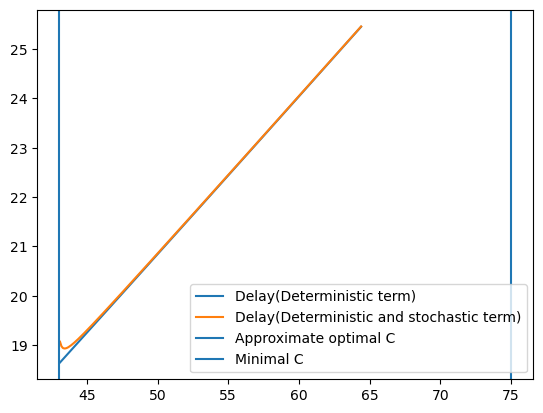

In [38]:
# visualize webster's formula
q = 240*np.ones((4,2))
y_r = (q/config['sfr']).max(axis=-1)
Y = y_r.sum()
L = config['L']

C_range = [np.ceil(L/(1-Y)).astype(int),np.ceil(L/(1-Y)).astype(int)*1.5]
C_arr = np.arange(*C_range,0.1)[1:]
num_C = len(C_arr)
sigma_arr = C_arr*Y/(C_arr-L)
delay_arr_det = np.zeros(num_C)
delay_arr = np.zeros(num_C)
for i,sigma in enumerate(sigma_arr):
    config_temp = copy.deepcopy(config)
    config_temp['is_stochastic'] = False
    delay_arr_det[i] = delay_webster(y_r,sigma,config_temp)
    config_temp['is_stochastic'] = True
    delay_arr[i] = delay_webster(y_r,sigma,config_temp)

fig,ax = plt.subplots()
ax.plot(C_arr,delay_arr_det,label='Delay(Deterministic term)')
ax.plot(C_arr,delay_arr,label='Delay(Deterministic and stochastic term)')
ax.axvline(np.ceil((1.5*L+5.0)/(1-Y)).astype(int),0,1,label='Approximate optimal C')
ax.axvline(np.ceil(L/(1-Y)).astype(int),0,1,label='Minimal C')
ax.legend()

##### 稳定到达

In [28]:
# load configs
default_config_dir = 'default_config.yaml'
config = parse_config(default_config_dir)
print(config['is_stochastic'])

True


In [29]:
# simulation
point_queue_model('webster-exact',config)

##### 自回归到达

##### 可视化

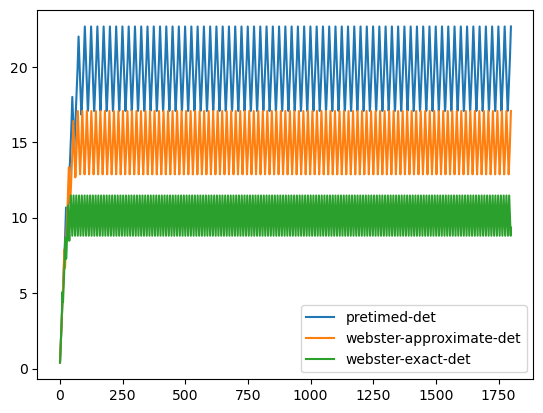

In [32]:
# delay visualization
names = ['pretimed-det','webster-approximate-det','webster-exact-det']
q_res = {}
for name in names:
    q_res[name] = np.load('./results/'+name+'.npy')

fig,ax = plt.subplots()
for name in names:
    ax.plot(q_res[name].sum((-1,-2)),label=name)
    # ax.plot(q_res[name][:,1,0],label=name)
ax.legend()

In [34]:
# delay average
for name in names:
    print(f'average delay of '+name+': '+str(q_res[name].sum((-1,-2)).mean()))

average delay of pretimed-det: 19.365481481481492
average delay of webster-approximate-det: 14.693111111111126
average delay of webster-exact-det: 10.021407407407409


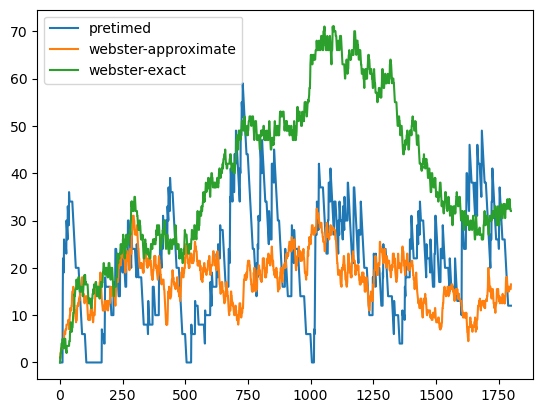

In [35]:
# delay visualization
names = ['pretimed','webster-approximate','webster-exact']
q_res = {}
for name in names:
    q_res[name] = np.load('./results/'+name+'.npy')

fig,ax = plt.subplots()
for name in names:
    ax.plot(q_res[name].sum((-1,-2)),label=name)
    # ax.plot(q_res[name][:,1,0],label=name)
ax.legend()

In [37]:
# delay average
for name in names:
    print(f'average delay of '+name+': '+str(q_res[name].sum((-1,-2)).mean()))

average delay of pretimed: 21.626666666666665
average delay of webster-approximate: 17.445
average delay of webster-exact: 39.11194444444445
